In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('Train_UWu5bXk.csv')
test=pd.read_csv("Test_u94Q5KV.csv")

In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
train['source']='train'
test['source']='test'

In [6]:
data=pd.concat([train, test], ignore_index=True)

In [7]:
print(train.shape, test.shape, data.shape)

((8523, 13), (5681, 12), (14204, 13))


In [8]:
data.apply(lambda x:sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [9]:
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [10]:
# unique category in categorical variable
data.apply(lambda x: len(x.unique()))

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
source                           2
dtype: int64

In [13]:
cat_columns =[x for x in data.dtypes.index 
                     if data.dtypes[x]=='object']

In [14]:
# exclude ID cols & source column
cat_columns = [x for x in cat_columns if x not in 
               ['Item_Identifier', 'Outlet_Identifier', 'source']]

In [15]:
# print freq of categories
for col in cat_columns:
    print('\n Frequency of Categories for variable %s' %col)
    print(data[col].value_counts())


 Frequency of Categories for variable Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

 Frequency of Categories for variable Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

 Frequency of Categories for variable Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

 Frequency of Categories for variable Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: 

Missing values

In [16]:
# item_Weight and Outlet_Size
# we will put avg wt of particular item
item_avg_weight = data.pivot_table(values='Item_Weight',
                                   index='Item_Identifier')

In [17]:
miss_bool = data['Item_Weight'].isnull()

In [18]:
data.loc[miss_bool,'Item_Weight']=data.loc[miss_bool, 'Item_Identifier'].apply(lambda x : item_avg_weight[x])

In [19]:
sum(data['Item_Weight'].isnull())

0

In [21]:
from scipy.stats import mode

In [22]:
# for outlet_size we will impute mode for each outlet_type

outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',
                                   aggfunc=(lambda x:mode(x).mode[0]))

C:\ProgramData\Anaconda2\lib\site-packages\scipy\stats\stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)
C:\ProgramData\Anaconda2\lib\site-packages\numpy\lib\arraysetops.py:216: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


In [24]:
outlet_size_mode

Outlet_Type
Grocery Store         Small
Supermarket Type1     Small
Supermarket Type2    Medium
Supermarket Type3    Medium
Name: Outlet_Size, dtype: object

In [25]:
miss_bool=data['Outlet_Size'].isnull()

In [26]:
data.loc[miss_bool, 'Outlet_Size']=data.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [27]:
sum(data['Outlet_Size'].isnull())

0

Feature Engineering

In [28]:
#Should we combine type2 and type 3 to single value of outlet type
# easiest way to check by taking mean of sales, if they have 
# similar sales, then no need to keep separate

data.pivot_table(values='Item_Outlet_Sales', index='Outlet_Type')

Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

In [29]:
# so no need to combine

In [31]:
data.Item_Visibility.describe()

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

In [32]:
# min value is 0 which doesn't make sense
# let's replace with mean visibility of product
visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')


In [33]:
miss_bool = (data['Item_Visibility']==0)

In [34]:
data.loc[miss_bool, 'Item_Visibility']=data.loc[miss_bool, 'Item_Identifier'].apply(lambda x: visibility_avg[x])

In [35]:
sum(data['Item_Visibility']==0)

0

In [36]:
# we have to also look the visibility of product in that particulat store
# as compared to the mean visibility of product in that product
# in all stores

In [38]:
data['Item_Visibility_MeanRatio']=data.apply(lambda x:x['Item_Visibility']/visibility_avg[x['Item_Identifier']], axis=1)

In [39]:
data['Item_Visibility_MeanRatio'].describe()

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64

In [40]:
# create a broad category of Item_Type
data.Item_Type.value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [41]:
data.Item_Identifier.head()

0    FDA15
1    DRC01
2    FDN15
3    FDX07
4    NCD19
Name: Item_Identifier, dtype: object

In [42]:
# the first two character shows item type
data['Item_Type_Combined']=data['Item_Identifier'].apply(lambda x:x[0:2])

In [43]:
data['Item_Type_Combined']=data['Item_Type_Combined'].map({
    'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'
})

In [44]:
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [45]:
# we can also combine item type based on the sales (high
# avg sales could be combine together)

In [46]:
data.pivot_table(values='Item_Outlet_Sales', index='Item_Type')

Item_Type
Baking Goods             1952.971207
Breads                   2204.132226
Breakfast                2111.808651
Canned                   2225.194904
Dairy                    2232.542597
Frozen Foods             2132.867744
Fruits and Vegetables    2289.009592
Hard Drinks              2139.221622
Health and Hygiene       2010.000265
Household                2258.784300
Meat                     2158.977911
Others                   1926.139702
Seafood                  2326.065928
Snack Foods              2277.321739
Soft Drinks              2006.511735
Starchy Foods            2374.332773
Name: Item_Outlet_Sales, dtype: float64

Determine the years of operation of a store

In [51]:
data['Outlet_Establishment_Year'].describe()

count    14204.000000
mean      1997.830681
std          8.371664
min       1985.000000
25%       1987.000000
50%       1999.000000
75%       2004.000000
max       2009.000000
Name: Outlet_Establishment_Year, dtype: float64

In [52]:
import datetime

In [53]:
present_year=datetime.datetime.now().year

In [56]:
data['Outlet_Years']=2013-data['Outlet_Establishment_Year']

In [57]:
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [58]:
# modify categories of item_fat_content

In [59]:
data.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [60]:
data['Item_Fat_Content']=data['Item_Fat_Content'].replace({
    'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'
})

In [63]:
data.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [64]:
# As there are soe non consumable type of product,
#there should not be fat content for them

In [65]:
data.loc[data['Item_Type_Combined']=='Non-Consumable', 'Item_Fat_Content']='Non_Edible'

In [66]:
data.Item_Fat_Content.value_counts()

Low Fat       6499
Regular       5019
Non_Edible    2686
Name: Item_Fat_Content, dtype: int64

In [70]:
data['Outlet_Identifier'].value_counts()

OUT027    1559
OUT013    1553
OUT035    1550
OUT046    1550
OUT049    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

Numerical & One Hot Encoding for categorical variable

In [79]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Outlet']=le.fit_transform(data['Outlet_Identifier'])
var_mod =['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Size',
         'Item_Type_Combined', 'Outlet_Type', 'Outlet']
le=LabelEncoder()
for i in var_mod:
    data[i]=le.fit_transform(data[i])

In [80]:
data.dtypes

Item_Fat_Content               int64
Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
Outlet_Location_Type           int64
Outlet_Size                    int64
Outlet_Type                    int64
source                        object
Item_Visibility_MeanRatio    float64
Item_Type_Combined             int64
Outlet_Years                   int64
Outlet                         int64
dtype: object

In [81]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Visibility_MeanRatio,Item_Type_Combined,Outlet_Years,Outlet
0,0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,0,1,1,train,0.931078,1,14,9
1,2,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,2,1,2,train,0.933420,0,4,3
2,0,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,0,1,1,train,0.960069,1,14,9
3,2,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.20,1998,OUT010,2,2,0,train,1.000000,1,15,0
4,1,NCD19,53.8614,994.7052,Household,0.009780,8.93,1987,OUT013,2,0,1,train,1.000000,2,26,1


In [82]:
#One Hot Coding:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

In [83]:
data.dtypes

Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
source                        object
Item_Visibility_MeanRatio    float64
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
O

In [85]:
train = data.loc[data['source']=='train']
test=data.loc[data['source']=='test']

In [86]:
# drop unnecessary columns:
test.drop(['Item_Type', 'Outlet_Establishment_Year','Item_Outlet_Sales', 'source'], axis=1, inplace=True)
train.drop(['Item_Type', 'Outlet_Establishment_Year', 'source'], axis=1, inplace=True)


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [87]:
train.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Identifier,Item_Visibility_MeanRatio,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,249.8092,3735.1380,0.016047,9.30,OUT049,0.931078,14,1,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,0.019278,5.92,OUT018,0.933420,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,0.016760,17.50,OUT049,0.960069,14,1,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,0.017834,19.20,OUT010,1.000000,15,0,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,0.009780,8.93,OUT013,1.000000,26,0,1,...,0,1,0,0,0,0,0,0,0,0


Model Building

In [88]:
# base line Model: just avg

mean_sales=train['Item_Outlet_Sales'].mean()
base1 = test[['Item_Identifier', 'Outlet_Identifier']]
base1['Item_Outlet_Sales']=mean_sales
base1.to_csv('mean_algo.csv', index=False)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [99]:
target='Item_Outlet_Sales'
IDcol=['Item_Identifier', 'Outlet_Identifier']
from sklearn import model_selection, metrics
#cross_validation.cross_val_score()-depricated
#model_selection.cross_val_score()
def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    alg.fit(dtrain[predictors],dtrain[target])
    dtrain_predictions=alg.predict(dtrain[predictors])
    #mean_squared_error is depricated. use neg_mean_squared_error
    cv_score = model_selection.cross_val_score(alg, dtrain[predictors],
                                              dtrain[target], cv=20, scoring = 'neg_mean_squared_error')
    cv_score=np.sqrt(np.abs(cv_score))
    print('\nModel Report')
    print('RMSE: %.4g' % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    dtest[target]=alg.predict(dtest[predictors])
    
    IDcol.append(target)
    submission = pd.DataFrame({x:dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)

Linear Regression

In [100]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [101]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
predictors

['Item_MRP',
 'Item_Visibility',
 'Item_Weight',
 'Item_Visibility_MeanRatio',
 'Outlet_Years',
 'Item_Fat_Content_0',
 'Item_Fat_Content_1',
 'Item_Fat_Content_2',
 'Outlet_Location_Type_0',
 'Outlet_Location_Type_1',
 'Outlet_Location_Type_2',
 'Outlet_Size_0',
 'Outlet_Size_1',
 'Outlet_Size_2',
 'Outlet_Type_0',
 'Outlet_Type_1',
 'Outlet_Type_2',
 'Outlet_Type_3',
 'Item_Type_Combined_0',
 'Item_Type_Combined_1',
 'Item_Type_Combined_2',
 'Outlet_0',
 'Outlet_1',
 'Outlet_2',
 'Outlet_3',
 'Outlet_4',
 'Outlet_5',
 'Outlet_6',
 'Outlet_7',
 'Outlet_8',
 'Outlet_9']

In [102]:
linreg= LinearRegression(normalize=True)
modelfit(linreg, train, test, predictors, target, IDcol, 'lin_reg.csv')


Model Report
RMSE: 1127
CV Score : Mean - 1129 | Std - 43.42 | Min - 1075 | Max - 1210


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [107]:
linreg_coef= pd.Series(linreg.coef_, predictors).sort_values()
linreg_coef

Outlet_Location_Type_1      -4.907140e+15
Outlet_Size_0               -4.147628e+15
Outlet_Location_Type_2      -3.517175e+15
Outlet_9                    -3.427466e+15
Outlet_8                    -3.140597e+15
Outlet_2                    -3.078175e+15
Outlet_6                    -2.302317e+15
Outlet_Location_Type_0      -2.258525e+15
Item_Fat_Content_0          -1.899198e+15
Item_Fat_Content_2          -1.899198e+15
Outlet_7                    -1.785078e+15
Outlet_3                    -1.713289e+15
Outlet_Type_0               -1.534381e+15
Item_Type_Combined_2        -9.059569e+14
Outlet_Type_2               -5.475024e+14
Outlet_Years                -2.586195e+14
Item_Fat_Content_1          -1.036844e+14
Item_Visibility             -2.370872e+02
Item_Weight                  7.920719e-02
Item_MRP                     1.555758e+01
Item_Visibility_MeanRatio    7.897886e+01
Outlet_Size_1                2.855290e+14
Outlet_Size_2                5.158989e+14
Item_Type_Combined_0         8.895

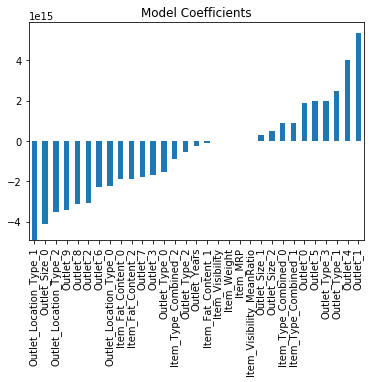

In [105]:
import matplotlib.pyplot as plt
%matplotlib inline
linreg_coef.plot(kind='bar', title='Model Coefficients')

In [108]:
# As coeff are very large there is overfitting. use ridge & lasso

Ridge Regression Model

In [109]:
from sklearn.linear_model import Ridge
predictors =[x for x in train.columns if x not in [target]+IDcol]
ridge_reg=Ridge(alpha=0.05, normalize=True)

In [110]:
modelfit(ridge_reg, train, test, predictors, target, IDcol, 'ridge_reg.csv')


Model Report
RMSE: 1129
CV Score : Mean - 1130 | Std - 44.6 | Min - 1076 | Max - 1217


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [111]:
ridge_coef = pd.Series(ridge_reg.coef_, predictors).sort_values()

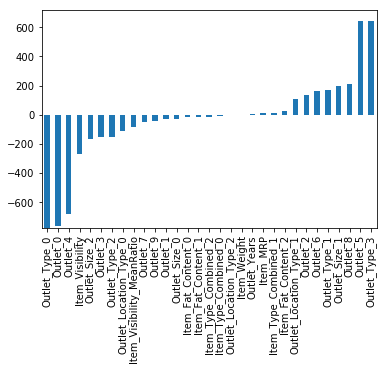

In [112]:
ridge_coef.plot(kind='bar')